In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

import Magnaplot

%matplotlib notebook

zdi_data = Table.read("../zdi_data/MasterTable_ZDI.csv",format='csv')


In [150]:
zdi_data[10:]






Star Name,Mass(Msun),Prot(d),Ro,log RX,fV,<B2>(1e5 G2),<B>(kG),Pol.,Dip.,Qua.,Oct.,Axisym
str14,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64
EV Lac (07),0.32,4.38,0.068,-3.3,0.1,3.24,0.49,0.98,0.75,0.1,0.03,0.31
YZ CMi (07),0.31,2.77,0.042,-3.1,0.11,5.66,0.56,0.92,0.69,0.1,0.05,0.61
YZ CMi (08),0.31,2.77,0.042,-3.1,0.11,4.75,0.55,0.97,0.72,0.11,0.08,0.86
AD Leo (07),0.42,2.24,0.047,-3.2,0.14,0.61,0.19,0.99,0.56,0.12,0.05,0.97
AD Leo (08),0.42,2.24,0.047,-3.2,0.14,0.61,0.18,0.95,0.63,0.09,0.03,0.88
EQ Peg A (06),0.39,1.06,0.02,-3.0,0.11,2.73,0.48,0.85,0.7,0.06,0.06,0.7
EQ Peg B (06),0.25,0.4,0.005,-3.3,nan,2.38,0.45,0.97,0.79,0.08,0.05,0.94
V374 Peg (05),0.28,0.45,0.006,-3.2,nan,6.55,0.78,0.96,0.72,0.12,0.07,0.76
V374 Peg (06),0.28,0.45,0.006,-3.2,nan,4.6,0.64,0.96,0.7,0.17,0.04,0.77


<IPython.core.display.Javascript object>


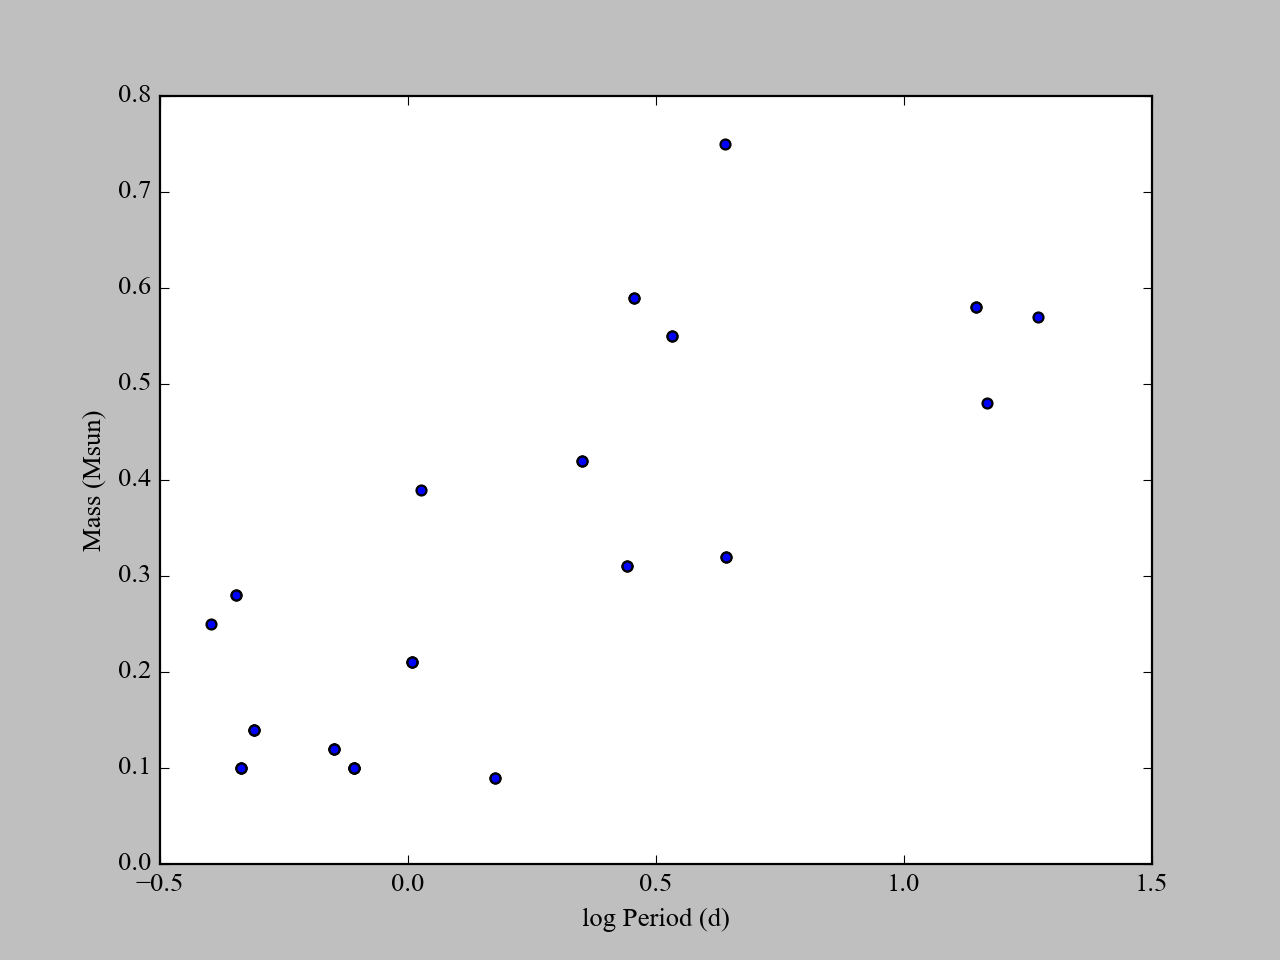

Text(0,0.5,'Mass (Msun)')

In [55]:
#Example plot

plt.scatter(np.log10(zdi_data[2][:]),[zdi_data[1][:]])
plt.xlabel("log Period (d)")
plt.ylabel("Mass (Msun)")

In [8]:
mass = zdi_data[1][:]
period = zdi_data[2][:]
rossby = zdi_data[3][:]
B2 = zdi_data[6][:]
Bfield = zdi_data[7][:]
poloidal = zdi_data[8][:]
dipole = zdi_data[9][:]
quad = zdi_data[10][:]
octo = zdi_data[11][:]
axisym = zdi_data[12][:]

<IPython.core.display.Javascript object>


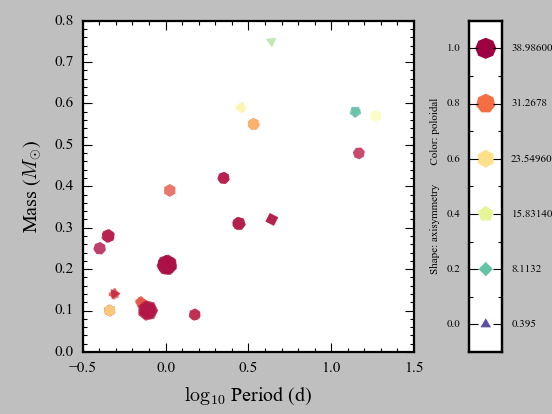

(<Figure size 276x207 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116b67be0>)

In [58]:
#MagnaPlot(xin,yin,colin,areain,symbin)
Magnaplot.MagnaPlot(np.log10(period),mass,poloidal,B2,axisym,file='confuso.pdf',
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.5,1.5])

<IPython.core.display.Javascript object>


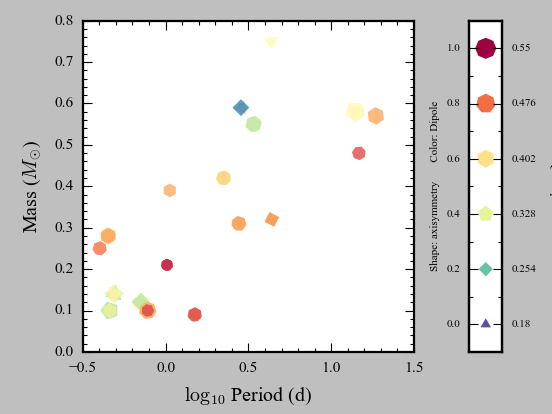

(<Figure size 276x207 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117a89588>)

In [60]:
#MagnaPlot(xin,yin,colin,areain,symbin)
Magnaplot.MagnaPlot(np.log10(period),mass,dipole,quad,axisym,file='topo.pdf',
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.5,1.5],
                   collabel="Shape: axisymmetry       Color: Dipole",
                   arealabel="Quadrapole")

<IPython.core.display.Javascript object>


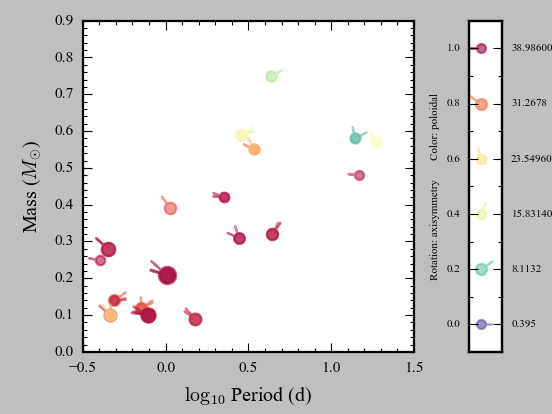

(<Figure size 276x207 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116598fd0>)

In [82]:
#NotchPlot(xin,yin,colin,areain,rotin)
Magnaplot.NotchPlot(np.log10(period),mass,poloidal,B2,axisym,file='confuso2.pdf',
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.5,1.5])

<IPython.core.display.Javascript object>


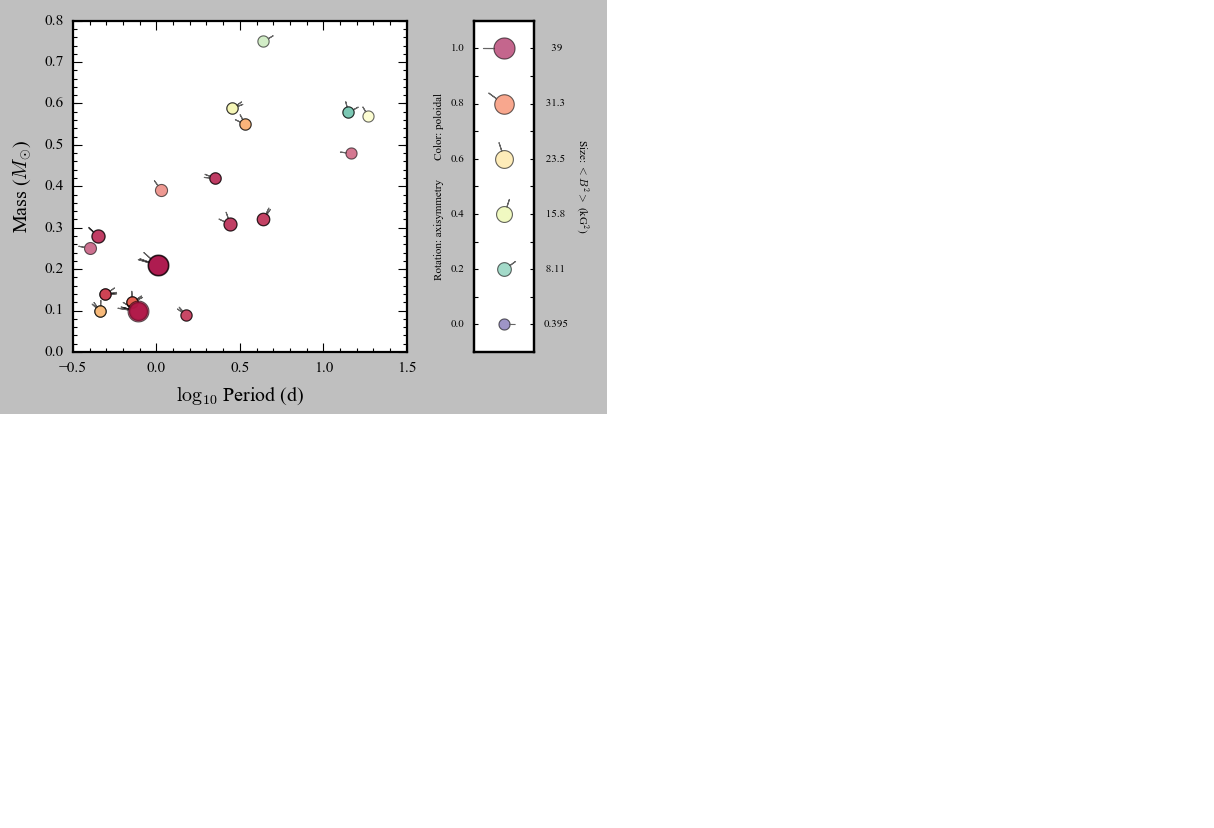

(<Figure size 303.6x207 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c4a6e10>)

In [144]:
reload(Magnaplot)
Magnaplot.NotchPlot(np.log10(period),mass,poloidal,B2,axisym,file='confuso3.pdf',
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.5,1.5])

<IPython.core.display.Javascript object>


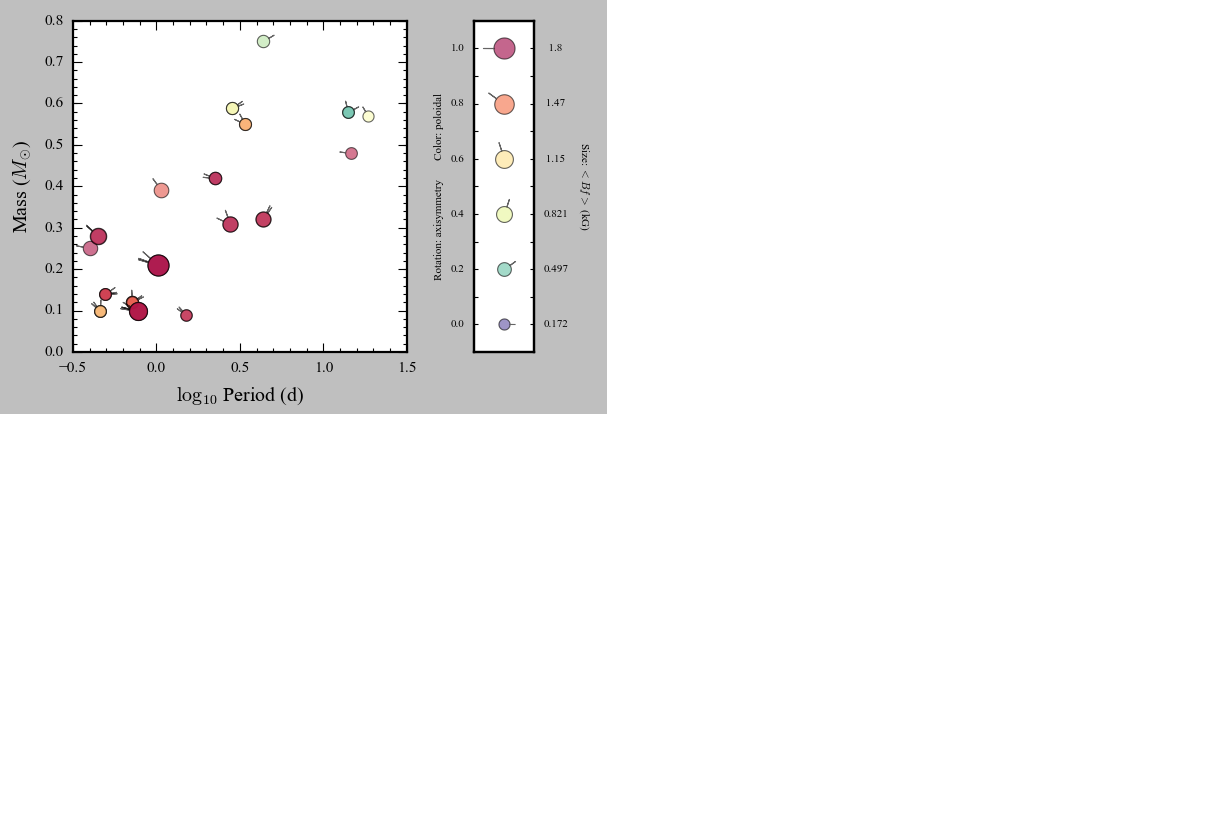

(<Figure size 303.6x207 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c7bebe0>)

In [145]:
Magnaplot.NotchPlot(np.log10(period),mass,poloidal,Bfield,axisym,file='confuso4.pdf',arealabel="Size: $<Bf>$ (kG)",
                    xlabel="$\log_{10}$ Period (d)",xlims=[-0.5,1.5],ylims=[0,0.8])